In [1]:
#import necessary packages
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization purpose
import random

In [6]:
#load training & testing data using mnist
get_ipython().run_line_magic("matplotlib","inline")
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

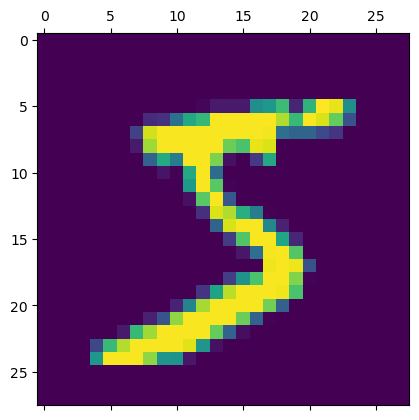

In [14]:
plt.matshow(x_train[0])

In [15]:
x_train=x_train/255

In [16]:
x_test=x_test/255

In [17]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
#c. define n/w architecture using keras
model=keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [29]:
history=model.fit(x_train,y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6447 - accuracy: 0.8374 - val_loss: 0.3608 - val_accuracy: 0.9018
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3439 - accuracy: 0.9033 - val_loss: 0.3005 - val_accuracy: 0.9168
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2961 - accuracy: 0.9165 - val_loss: 0.2695 - val_accuracy: 0.9247
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2654 - accuracy: 0.9249 - val_loss: 0.2444 - val_accuracy: 0.9308
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2415 - accuracy: 0.9322 - val_loss: 0.2251 - val_accuracy: 0.9384
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2215 - accuracy: 0.9375 - val_loss: 0.2090 - val_accuracy: 0.9417
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2049 - accuracy: 0.9426 - val_loss: 0.1941 - val_accuracy:

In [32]:
#evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1649 - accuracy: 0.9528
Loss=0.165
Accuracy=0.953


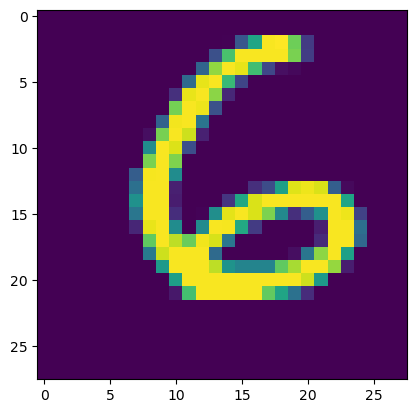

In [40]:
n=random.randint(0,999)
plt.imshow(x_test[n])

In [41]:
predicted_value=model.predict(x_test)
print("Handwritten number in the img:%d" %np.argmax (predicted_value))

313/313 [==============================] - 0s 758us/step
Handwritten number in the img:61140


In [44]:
get_ipython().run_line_magic('pinfo2','history.history')
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

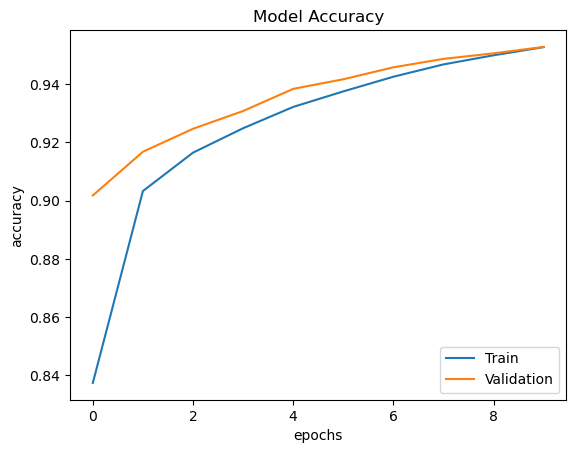

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Model Accuracy")
plt.legend(["Train" , "Validation"], loc="lower right")

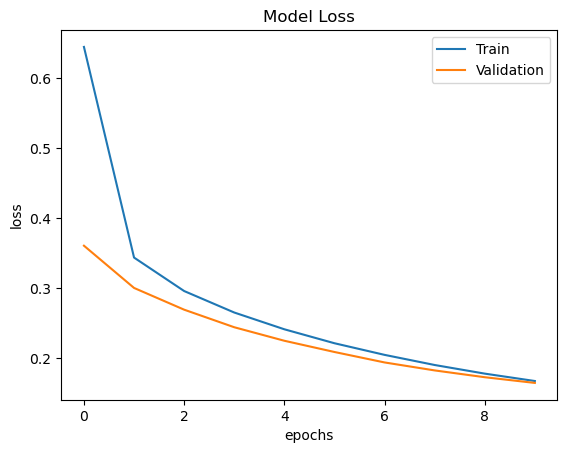

In [51]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Model Loss")
plt.legend(["Train", "Validation"], loc="upper right")

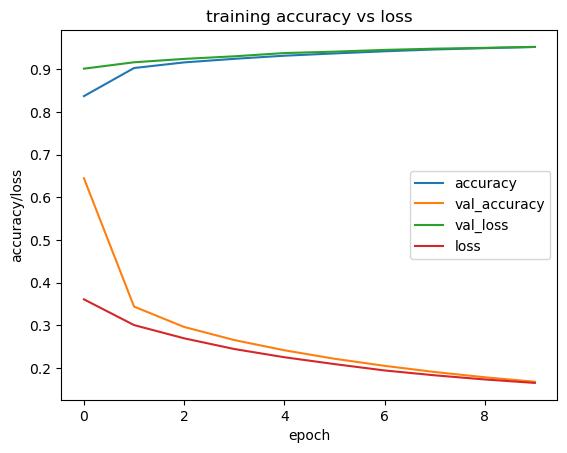

In [58]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("accuracy/loss")
plt.title("training accuracy vs loss")
plt.legend(["accuracy","val_accuracy","val_loss","loss"])

In [61]:
keras_model_path="C:/Users/Acer/GATE"
model.save(keras_model_path)



restored_keras_model = tf.keras.models.load_model(keras_model_path)

INFO:tensorflow:Assets written to: C:/Users/Acer/GATE\assets
